1 - Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import matplotlib.axes as axs
import seaborn as sns
sns.set()

2 - Purchase Probability - With Promotions

In [2]:
df_pa = pd.read_csv("customer-segmented-prepared.csv")
df_pa

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,47,1,110866,1,0,3,0,0,0,1
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,47,1,110866,1,0,3,0,0,0,1
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,47,1,110866,1,0,3,0,0,0,1
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,47,1,110866,1,0,3,0,0,0,1
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,47,1,110866,1,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58688,200000500,703,0,0,0,2,1,1.41,1.85,2.01,...,42,1,120946,1,0,3,0,0,0,1
58689,200000500,710,0,0,0,0,0,1.36,1.84,2.09,...,42,1,120946,1,0,3,0,0,0,1
58690,200000500,717,0,0,0,0,0,1.50,1.80,2.14,...,42,1,120946,1,0,3,0,0,0,1
58691,200000500,722,1,2,3,0,0,1.51,1.82,2.09,...,42,1,120946,1,0,3,0,0,0,1


In [3]:
Y = df_pa['Incidence']
X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1'] +
                    df_pa['Price_2'] +
                    df_pa['Price_3'] +
                    df_pa['Price_4'] +
                    df_pa['Price_5']) / 5
X['Mean_Promotion'] = (df_pa['Promotion_1'] +
                        df_pa['Promotion_2'] +
                        df_pa['Promotion_3'] +
                        df_pa['Promotion_4'] +
                        df_pa['Promotion_5']) / 5
X.head()

,Mean_Price,Mean_Promotion
0,2.044,0.2
1,2.028,0.0
2,2.028,0.0
3,2.028,0.0
4,2.030,0.0


In [4]:
model_incidence_promotion = LogisticRegression(solver='sag')
model_incidence_promotion.fit(X, Y)

LogisticRegression(solver='sag')

In [5]:
feature_name = X.columns.values
summary_table = pd.DataFrame(columns=['Feature Name'], data=feature_name)
summary_table['Coefficient'] = np.transpose(model_incidence_promotion.coef_)
intercept = pd.DataFrame(columns=['Feature Name'], data=["Bias"])
intercept["Coefficient"] = model_incidence_promotion.intercept_
summary_table = pd.concat([summary_table, intercept])
summary_table = summary_table.reset_index(drop=True)
summary_table['Odds Ratio'] = np.exp(summary_table.Coefficient)
summary_table

,Feature Name,Coefficient,Odds Ratio
0,Mean_Price,-1.493972,0.224479
1,Mean_Promotion,0.561554,1.753395
2,Bias,1.782993,5.947630


3 - Price Elasticity of Purchase Probability - With Promotion

In [6]:
df_pa[['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.159945,2.654798
std,0.091139,0.170868,0.046867,0.089825,0.098272
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.580000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.170000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


In [7]:
# minimum price = 1.10
# maximum price = 2.80
# Therefore, lets check the price elasticity for prices between 0.5 to 3.5
price_range = np.arange(0.5, 3.5, 0.01)
price_range

array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04,
       1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26,
       1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,
       1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48,
       1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59,
       1.6 , 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 ,
       1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81,
       1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92,
       1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.

In [8]:
df_price_elasticity_promotion = pd.DataFrame(price_range)
df_price_elasticity_promotion = df_price_elasticity_promotion.rename(columns={0: "Mean_Price"})
df_price_elasticity_promotion

,Mean_Price
0,0.50
1,0.51
2,0.52
3,0.53
4,0.54
...,...
295,3.45
296,3.46
297,3.47
298,3.48


In [9]:
df_price_elasticity_promotion['Mean_Promotion'] = 1
df_price_elasticity_promotion

,Mean_Price,Mean_Promotion
0,0.50,1
1,0.51,1
2,0.52,1
3,0.53,1
4,0.54,1
...,...,...
295,3.45,1
296,3.46,1
297,3.47,1
298,3.48,1


In [10]:
Y_promotion = model_incidence_promotion.predict_proba(
    df_price_elasticity_promotion)
Y_promotion

array([[0.16832283, 0.83167717],
       [0.17042462, 0.82957538],
       [0.17254721, 0.82745279],
       [0.17469067, 0.82530933],
       [0.17685507, 0.82314493],
       [0.17904046, 0.82095954],
       [0.18124692, 0.81875308],
       [0.18347448, 0.81652552],
       [0.18572322, 0.81427678],
       [0.18799317, 0.81200683],
       [0.19028438, 0.80971562],
       [0.19259689, 0.80740311],
       [0.19493075, 0.80506925],
       [0.19728597, 0.80271403],
       [0.19966259, 0.80033741],
       [0.20206063, 0.79793937],
       [0.20448012, 0.79551988],
       [0.20692106, 0.79307894],
       [0.20938348, 0.79061652],
       [0.21186737, 0.78813263],
       [0.21437273, 0.78562727],
       [0.21689957, 0.78310043],
       [0.21944788, 0.78055212],
       [0.22201763, 0.77798237],
       [0.22460882, 0.77539118],
       [0.22722142, 0.77277858],
       [0.2298554 , 0.7701446 ],
       [0.23251072, 0.76748928],
       [0.23518735, 0.76481265],
       [0.23788525, 0.76211475],
       [0.

In [11]:
# Column 1 = prob of not purchasing
# Column 2 = prob of purchasing
purchase_prob = Y_promotion[:, 1]
purchase_prob

array([0.83167717, 0.82957538, 0.82745279, 0.82530933, 0.82314493,
       0.82095954, 0.81875308, 0.81652552, 0.81427678, 0.81200683,
       0.80971562, 0.80740311, 0.80506925, 0.80271403, 0.80033741,
       0.79793937, 0.79551988, 0.79307894, 0.79061652, 0.78813263,
       0.78562727, 0.78310043, 0.78055212, 0.77798237, 0.77539118,
       0.77277858, 0.7701446 , 0.76748928, 0.76481265, 0.76211475,
       0.75939565, 0.75665538, 0.75389403, 0.75111164, 0.7483083 ,
       0.74548409, 0.74263908, 0.73977337, 0.73688706, 0.73398025,
       0.73105304, 0.72810556, 0.72513791, 0.72215024, 0.71914267,
       0.71611535, 0.71306841, 0.71000201, 0.70691631, 0.70381147,
       0.70068767, 0.69754509, 0.69438389, 0.69120429, 0.68800647,
       0.68479063, 0.68155699, 0.67830576, 0.67503716, 0.67175142,
       0.66844878, 0.66512947, 0.66179375, 0.65844186, 0.65507406,
       0.65169063, 0.64829182, 0.64487792, 0.64144922, 0.63800599,
       0.63454853, 0.63107714, 0.62759214, 0.62409382, 0.62058

In [12]:
df_price_elasticity = summary_table.Coefficient[0] * price_range * (1 - purchase_prob)
df_price_elasticity

array([-0.12573479, -0.12985089, -0.13404596, -0.13832097, -0.14267691,
       -0.14711478, -0.15163557, -0.15624026, -0.16092986, -0.16570534,
       -0.17056771, -0.17551795, -0.18055705, -0.185686  , -0.19090579,
       -0.19621739, -0.20162178, -0.20711995, -0.21271286, -0.21840149,
       -0.22418679, -0.23006972, -0.23605125, -0.24213231, -0.24831385,
       -0.25459681, -0.2609821 , -0.26747065, -0.27406337, -0.28076116,
       -0.28756491, -0.29447551, -0.30149383, -0.30862073, -0.31585707,
       -0.32320368, -0.33066138, -0.338231  , -0.34591333, -0.35370917,
       -0.36161928, -0.36964442, -0.37778533, -0.38604275, -0.39441737,
       -0.40290991, -0.41152102, -0.42025138, -0.42910162, -0.43807236,
       -0.4471642 , -0.45637773, -0.46571351, -0.47517208, -0.48475395,
       -0.49445964, -0.5042896 , -0.51424431, -0.52432418, -0.53452962,
       -0.54486102, -0.55531874, -0.56590311, -0.57661444, -0.587453  ,
       -0.59841907, -0.60951287, -0.62073461, -0.63208445, -0.64

In [13]:
df_price_elasticities = pd.DataFrame()
df_price_elasticities['Elasticity_Promotion_1'] = df_price_elasticity
df_price_elasticities

,Elasticity_Promotion_1
0,-0.125735
1,-0.129851
2,-0.134046
3,-0.138321
4,-0.142677
...,...
295,-4.861421
296,-4.879622
297,-4.897793
298,-4.915933


3 - Price Elasticity of Purchase Probability - Without Promotion

In [14]:
df_price_elasticity_no_promotion = pd.DataFrame(price_range)
df_price_elasticity_no_promotion = df_price_elasticity_no_promotion.rename(columns={
                                                                    0: "Mean_Price"})
df_price_elasticity_no_promotion

,Mean_Price
0,0.50
1,0.51
2,0.52
3,0.53
4,0.54
...,...
295,3.45
296,3.46
297,3.47
298,3.48


In [15]:
df_price_elasticity_no_promotion['Mean_Promotion'] = 0
df_price_elasticity_no_promotion

,Mean_Price,Mean_Promotion
0,0.50,0
1,0.51,0
2,0.52,0
3,0.53,0
4,0.54,0
...,...,...
295,3.45,0
296,3.46,0
297,3.47,0
298,3.48,0


In [16]:
Y_no_promotion = model_incidence_promotion.predict_proba(
    df_price_elasticity_no_promotion)
Y_no_promotion

array([[0.26192119, 0.73807881],
       [0.26481957, 0.73518043],
       [0.26773839, 0.73226161],
       [0.27067753, 0.72932247],
       [0.27363689, 0.72636311],
       [0.27661632, 0.72338368],
       [0.27961571, 0.72038429],
       [0.28263491, 0.71736509],
       [0.28567379, 0.71432621],
       [0.28873219, 0.71126781],
       [0.29180995, 0.70819005],
       [0.29490692, 0.70509308],
       [0.29802293, 0.70197707],
       [0.3011578 , 0.6988422 ],
       [0.30431135, 0.69568865],
       [0.30748339, 0.69251661],
       [0.31067373, 0.68932627],
       [0.31388217, 0.68611783],
       [0.3171085 , 0.6828915 ],
       [0.32035251, 0.67964749],
       [0.32361398, 0.67638602],
       [0.32689269, 0.67310731],
       [0.33018839, 0.66981161],
       [0.33350086, 0.66649914],
       [0.33682985, 0.66317015],
       [0.34017511, 0.65982489],
       [0.34353638, 0.65646362],
       [0.34691341, 0.65308659],
       [0.35030591, 0.64969409],
       [0.35371363, 0.64628637],
       [0.

In [17]:
# Column 1 = prob of not purchasing
# Column 2 = prob of purchasing
purchase_prob = Y_no_promotion[:, 1]
purchase_prob

array([0.73807881, 0.73518043, 0.73226161, 0.72932247, 0.72636311,
       0.72338368, 0.72038429, 0.71736509, 0.71432621, 0.71126781,
       0.70819005, 0.70509308, 0.70197707, 0.6988422 , 0.69568865,
       0.69251661, 0.68932627, 0.68611783, 0.6828915 , 0.67964749,
       0.67638602, 0.67310731, 0.66981161, 0.66649914, 0.66317015,
       0.65982489, 0.65646362, 0.65308659, 0.64969409, 0.64628637,
       0.64286373, 0.63942645, 0.63597482, 0.63250914, 0.62902971,
       0.62553683, 0.62203084, 0.61851203, 0.61498075, 0.61143731,
       0.60788205, 0.60431531, 0.60073744, 0.59714879, 0.5935497 ,
       0.58994054, 0.58632167, 0.58269345, 0.57905625, 0.57541046,
       0.57175644, 0.56809458, 0.56442525, 0.56074886, 0.55706579,
       0.55337644, 0.54968119, 0.54598046, 0.54227464, 0.53856414,
       0.53484935, 0.5311307 , 0.52740859, 0.52368343, 0.51995563,
       0.5162256 , 0.51249377, 0.50876055, 0.50502634, 0.50129158,
       0.49755667, 0.49382204, 0.49008809, 0.48635525, 0.48262

In [18]:
df_price_elasticity = summary_table.Coefficient[0] * \
    price_range * (1 - purchase_prob)
df_price_elasticity

array([-0.19565145, -0.20177283, -0.20799669, -0.21432385, -0.22075514,
       -0.22729135, -0.23393328, -0.24068171, -0.24753739, -0.25450108,
       -0.26157352, -0.26875542, -0.27604749, -0.28345041, -0.29096486,
       -0.2985915 , -0.30633096, -0.31418386, -0.32215081, -0.33023238,
       -0.33842913, -0.34674162, -0.35517036, -0.36371586, -0.3723786 ,
       -0.38115904, -0.39005761, -0.39907474, -0.4082108 , -0.41746619,
       -0.42684123, -0.43633626, -0.44595158, -0.45568744, -0.46554412,
       -0.47552183, -0.48562076, -0.4958411 , -0.50618299, -0.51664655,
       -0.52723187, -0.53793903, -0.54876807, -0.559719  , -0.5707918 ,
       -0.58198644, -0.59330285, -0.60474093, -0.61630056, -0.62798159,
       -0.63978384, -0.65170711, -0.66375115, -0.67591571, -0.6882005 ,
       -0.7006052 , -0.71312945, -0.72577289, -0.73853512, -0.75141571,
       -0.76441419, -0.77753008, -0.79076288, -0.80411204, -0.81757699,
       -0.83115715, -0.8448519 , -0.85866058, -0.87258254, -0.88

In [19]:
df_price_elasticities['Elasticity_Promotion_0'] = df_price_elasticity
df_price_elasticities

,Elasticity_Promotion_1,Elasticity_Promotion_0
0,-0.125735,-0.195651
1,-0.129851,-0.201773
2,-0.134046,-0.207997
3,-0.138321,-0.214324
4,-0.142677,-0.220755
...,...,...
295,-4.861421,-4.983045
296,-4.879622,-4.999951
297,-4.897793,-5.016837
298,-4.915933,-5.033702


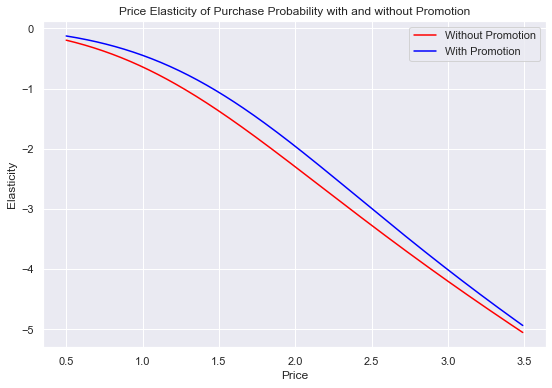

In [20]:
plt.figure(figsize=(9, 6))
plt.plot(price_range, df_price_elasticities['Elasticity_Promotion_0'], label="Without Promotion", color="red")
plt.plot(price_range, df_price_elasticities['Elasticity_Promotion_1'], label="With Promotion", color="blue")
plt.legend()
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability with and without Promotion')
plt.show()